<a href="https://colab.research.google.com/github/descartesmbogning/Deciphering_Bacteriophage_Revolution/blob/main/1_scholar_analysis_trend2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [3]:
from scipy import stats #the only import you actually need for this
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [4]:
# function that tests distribution then picks test accordingly
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

## import data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Import data
data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()
# Filter based on 'Publication Year' column
#data = data[data['Publication Year'] >= 2003]
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])
data#.head()

,Publication Year,Unnamed: 0,Publication Type,Authors,Author Full Names,Article Title,Source Title,Language,Document Type,Author Keywords,...,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,Topic N°
wos_ID,,,,,,,,,,,,,,,,,,,,,
wos:000183215700003,2003,23829,j,"campos, ja; aledo, jc; segura, ja; alonso, fj;...","campos, ja; aledo, jc; segura, ja; alonso, fj;...",expression of recombinant human l-glutaminase ...,biochimica et biophysica acta-proteins and pro...,english,article,recombinant protein expression; human cdna; mi...,...,biochemistry & molecular biology; biophysics,science citation index expanded (sci-expanded),biochemistry & molecular biology; biophysics,684pl,12758143.0,NaN,NaN,NaN,30/06/2023,6
wos:000180955900018,2003,23830,j,"ewert, s; honegger, a; pluckthun, a","ewert, s; honegger, a; pluckthun, a",structure-based improvement of the biophysical...,biochemistry,english,article,NaN,...,biochemistry & molecular biology,science citation index expanded (sci-expanded),biochemistry & molecular biology,645bg,12578364.0,NaN,NaN,NaN,30/06/2023,11
wos:000183683300008,2003,23831,j,"gottfried, p; silberstein, n; yagil, e; kolot, m","gottfried, p; silberstein, n; yagil, e; kolot, m",activity of coliphage hk022 excisionase (xis) ...,febs letters,english,article,site-specific recombination; excisionase; bact...,...,biochemistry & molecular biology; biophysics; ...,science citation index expanded (sci-expanded),biochemistry & molecular biology; biophysics; ...,692wm,12804763.0,"green submitted, bronze",NaN,NaN,30/06/2023,11
wos:000184760800009,2003,23832,j,"enriquez, c; alum, a; suarez-rey, em; choi, cy...","enriquez, c; alum, a; suarez-rey, em; choi, cy...",bacteriophages ms2 and prd1 in turfgrass by su...,journal of environmental engineering-asce,english,article,vegetation; contamination; trickle irrigation;...,...,"engineering, environmental; engineering, civil...",science citation index expanded (sci-expanded),engineering; environmental sciences & ecology,711vb,NaN,NaN,NaN,NaN,30/06/2023,12
wos:000187153000005,2003,23833,j,"heigstrand, c; wikoff, wr; duda, rl; hendrix, ...","heigstrand, c; wikoff, wr; duda, rl; hendrix, ...",the refined structure of a protein catenane: t...,journal of molecular biology,english,article,bacteriophage hk97; crystal structure; chain m...,...,biochemistry & molecular biology,science citation index expanded (sci-expanded),biochemistry & molecular biology,752gp,NaN,NaN,NaN,NaN,30/06/2023,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wos:000959867000004,2023,61561,j,"farrell, jd; dobnikar, j; podgornik, r","farrell, james daniel; dobnikar, jure; podgorn...",role of genome topology in the stability of vi...,physical review research,english,article,NaN,...,"physics, multidisciplinary",emerging sources citation index (esci),physics,c1vb9,NaN,gold,NaN,NaN,30/06/2023,13
wos:000968835000001,2023,61562,j,"lan, jx; wu, y; lin, cm; chen, jz; zhu, rq; ma...","lan, jinxin; wu, yao; lin, changmei; chen, jia...",totally-green cellulosic fiber with prominent ...,chemical engineering journal,english,article,guanylated chitosan oligosaccharide; cellulose...,...,"engineering, environmental; engineering, chemical",science citation index expanded (sci-expanded),engineering,d4zp0,36992868.0,"bronze, green published",NaN,NaN,30/06/2023,4
wos:000933339800001,2023,61563,j,"hirao, r; shigetoh, k; inagaki, s; ishida, n","hirao, rie; shigetoh, keisuke; inagaki, shinji...",virus inactivation based on optimal surfactant...,acs applied bio materials,english,article; early access,virus inactivation; mesoporous silica; surfact...,...,nanoscience & nanotechnology; materials scienc...,emerging sources citation index (esci),science & technology - other topics; materials...,8z4gw,36780326.0,hybrid,NaN,NaN,30/06/2023,12


In [7]:
# Check the number of papers
num_papers = data.shape[0]
print(f"Number of Papers: {num_papers}")


Number of Papers: 36202


# Publications trends

In [8]:
data_trend = data['Publication Year'].value_counts().reset_index().sort_values('index')
data_trend

,index,Publication Year
16,2003,1451
17,2004,1438
19,2005,1343
18,2006,1431
13,2007,1491
15,2008,1480
14,2009,1483
12,2010,1573
11,2011,1682
8,2012,1728


In [9]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(data_trend, *['index', 'Publication Year', None], **{})
chart

In [10]:
# Calculate the inverse cumulative proportion
data_trend['Inverse Cumulative Proportion'] = data_trend['Publication Year'].iloc[::-1].cumsum() / data_trend['Publication Year'].sum()

data_trend

,index,Publication Year,Inverse Cumulative Proportion
16,2003,1451,1.000000
17,2004,1438,0.959919
19,2005,1343,0.920198
18,2006,1431,0.883100
13,2007,1491,0.843572
15,2008,1480,0.802387
14,2009,1483,0.761505
12,2010,1573,0.720540
11,2011,1682,0.677090
8,2012,1728,0.630628


# countries, region and income

## import data

In [11]:
#Import data
country_data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_all.pkl').reset_index()
# Filter based on 'Publication Year' column
country_data = country_data[country_data['Publication Year'] >= 2003]
country_data = country_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
country_data#.head()

,,Addresses,United States,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Vietnam,Yemen,Zambia,Zimbabwe,Bahamas,Bosnia and Herzegovina,Montenegro,Macau,Seychelles,Vatican
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,,
wos:000183215700003,2003,"univ malaga, fac ciencias, lab quim prot, dept...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:000180955900018,2003,"univ zurich, inst biochem, ch-8057 zurich, swi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:000183683300008,2003,"tel aviv univ, dept biochem, il-69978 tel aviv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:000184760800009,2003,"univ arizona, dept soil water & environm sci, ...",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:000187153000005,2003,"uppsala univ, dept cell & mol biol, s-75124 up...",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wos:000968835000001,2023,"[lan, jinxin; wu, yao; lin, changmei; chen, ji...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:000933339800001,2023,"[hirao, rie; shigetoh, keisuke; inagaki, shinj...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:000914484900001,2023,"[brogna, carlo; bisaccia, domenico rocco] dept...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
citation_data = data.copy().reset_index().set_index(['wos_ID','Publication Year'])[['Times Cited, All Databases']]
citation_data

,,"Times Cited, All Databases"
wos_ID,Publication Year,
wos:000183215700003,2003,19
wos:000180955900018,2003,114
wos:000183683300008,2003,2
wos:000184760800009,2003,26
wos:000187153000005,2003,14
...,...,...
wos:000959867000004,2023,0
wos:000968835000001,2023,0
wos:000933339800001,2023,0


In [13]:
country_data_citation = pd.concat([country_data, citation_data], axis=1)
country_data_citation#.head(2)

,,Addresses,United States,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Yemen,Zambia,Zimbabwe,Bahamas,Bosnia and Herzegovina,Montenegro,Macau,Seychelles,Vatican,"Times Cited, All Databases"
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,,
wos:000183215700003,2003,"univ malaga, fac ciencias, lab quim prot, dept...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
wos:000180955900018,2003,"univ zurich, inst biochem, ch-8057 zurich, swi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0
wos:000183683300008,2003,"tel aviv univ, dept biochem, il-69978 tel aviv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
wos:000184760800009,2003,"univ arizona, dept soil water & environm sci, ...",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0
wos:000187153000005,2003,"uppsala univ, dept cell & mol biol, s-75124 up...",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wos:000968835000001,2023,"[lan, jinxin; wu, yao; lin, changmei; chen, ji...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
wos:000933339800001,2023,"[hirao, rie; shigetoh, keisuke; inagaki, shinj...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
wos:000914484900001,2023,"[brogna, carlo; bisaccia, domenico rocco] dept...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [14]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in country_data_citation.columns[:-1]:
    publication_counts[column] = country_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = country_data_citation[country_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = country_data_citation[country_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['Country', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['Country', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['Country', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='Country', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='Country', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('Country')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_count_citation_list.csv')

final_merged_df#.head(60)

,Country,Publication Count,Total Citation,Average Citation Count,%
0,Addresses,37645,1170299.0,32.371625,100.000000
1,United States,13984,588538.0,43.832427,37.147031
2,Albania,4,113.0,28.250000,0.010626
3,Algeria,4,133.0,33.250000,0.010626
4,Argentina,220,5241.0,24.721698,0.584407
...,...,...,...,...,...
151,Bosnia and Herzegovina,0,0.0,NaN,0.000000
152,Montenegro,0,0.0,NaN,0.000000
153,Macau,0,0.0,NaN,0.000000
154,Seychelles,0,0.0,NaN,0.000000


In [15]:
# Reset the index to make 'Publication Year' a regular column
country_data2 = country_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
country_data2['Year Group'] = pd.cut(country_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Drop unnecessary columns
country_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(country_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='Country', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'Country']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'Country', 'Publication Count',	'Total Citation']


grouped

,Year Group,Country,Publication Count,Total Citation
0,"[2003, 2008)",Albania,0,0.0
1,"[2003, 2008)",Algeria,1,82.0
2,"[2003, 2008)",Argentina,38,1980.0
3,"[2003, 2008)",Armenia,1,8.0
4,"[2003, 2008)",Australia,185,10540.0
...,...,...,...,...
730,"[2023, 2028)",Venezuela,1,0.0
731,"[2023, 2028)",Vietnam,3,1.0
732,"[2023, 2028)",Yemen,0,0.0
733,"[2023, 2028)",Zambia,0,0.0


In [16]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='Country', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                                         \
Year Group      [2003, 2008) [2008, 2013) [2013, 2018) [2018, 2023)   
Country                                                               
Albania                  0.0          0.0          2.0          2.0   
Algeria                  1.0          0.0          2.0          1.0   
Argentina               38.0         49.0         58.0         73.0   
Armenia                  1.0          2.0          3.0          8.0   
Australia              185.0        224.0        286.0        442.0   
...                      ...          ...          ...          ...   
Venezuela                4.0          2.0          0.0          4.0   
Vietnam                  6.0         10.0         23.0         47.0   
Yemen                    0.0          1.0          0.0          1.0   
Zambia                   4.0          1.0          0.0          1.0   
Zimbabwe                 1.0          1.0          1.0          1.0   

                        Total Citation                                         \
Year Group [2023, 2028)   [2003, 2008) [2008, 2013) [2013, 2018) [2018, 2023)   
Country                                                                         
Albania             0.0            0.0          0.0         96.0         17.0   
Algeria             0.0           82.0          0.0         49.0          2.0   
Argentina           2.0         1980.0       1514.0       1140.0        607.0   
Armenia             0.0            8.0          4.0         13.0         60.0   
Australia          42.0        10540.0      10867.0       9014.0       6671.0   
...                 ...            ...          ...          ...          ...   
Venezuela           1.0           92.0         43.0          0.0         20.0   
Vietnam             3.0          197.0        387.0        569.0        644.0   
Yemen               0.0            0.0         20.0          0.0         12.0   
Zambia              0.0          109.0         13.0          0.0          1.0   
Zimbabwe            0.0           11.0         46.0         11.0          9.0   

                         
Year Group [2023, 2028)  
Country                  
Albania             0.0  
Algeria             0.0  
Argentina           0.0  
Armenia             0.0  
Australia          62.0  
...                 ...  
Venezuela           0.0  
Vietnam             1.0  
Yemen               0.0  
Zambia              0.0  
Zimbabwe            0.0  

[147 rows x 10 columns]

# region

## UN REGION GROUP

In [17]:
un_region_group = ['Addresses','un_north_africa','un_eastern_africa','un_middle_africa','un_Southern_africa','un_Western_africa',
    'un_Latin_America_and_the_Caribbean','un_Northern_America',
    'un_Central_Asia','un_Eastern_Asia','un_South_eastern_Asia','un_Southern_Asia','un_Western_Asia',
    'un_Eastern_Europe','un_Northern_Europe','un_Southern_Europe','un_Western_Europe',
    'un_Australia_and_New_Zealand','un_Melanesia','un_Micronesia','un_Polynesia']

In [18]:
#Import data
un_region_group_data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_and_un_wb_region_income_all.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
un_region_group = [region for region in un_region_group if region in un_region_group_data.columns]#

# Select columns and reset index
un_region_group_data = un_region_group_data[un_region_group].reset_index()

# Rename columns and set index
un_region_group_data = un_region_group_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
un_region_group_data#.head()

,,Addresses,un_north_africa,un_eastern_africa,un_middle_africa,un_Southern_africa,un_Western_africa,un_Latin_America_and_the_Caribbean,un_Northern_America,un_Central_Asia,un_Eastern_Asia,un_South_eastern_Asia,un_Southern_Asia,un_Western_Asia,un_Eastern_Europe,un_Northern_Europe,un_Southern_Europe,un_Western_Europe,un_Australia_and_New_Zealand,un_Melanesia
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wos:000968835000001,2023,"[lan, jinxin; wu, yao; lin, changmei; chen, ji...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:000933339800001,2023,"[hirao, rie; shigetoh, keisuke; inagaki, shinj...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:000914484900001,2023,"[brogna, carlo; bisaccia, domenico rocco] dept...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN


In [19]:
un_region_group_data_citation = pd.concat([un_region_group_data, citation_data], axis=1)
un_region_group_data_citation#.head(2)

,,Addresses,un_north_africa,un_eastern_africa,un_middle_africa,un_Southern_africa,un_Western_africa,un_Latin_America_and_the_Caribbean,un_Northern_America,un_Central_Asia,un_Eastern_Asia,un_South_eastern_Asia,un_Southern_Asia,un_Western_Asia,un_Eastern_Europe,un_Northern_Europe,un_Southern_Europe,un_Western_Europe,un_Australia_and_New_Zealand,un_Melanesia,"Times Cited, All Databases"
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wos:000968835000001,2023,"[lan, jinxin; wu, yao; lin, changmei; chen, ji...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
wos:000933339800001,2023,"[hirao, rie; shigetoh, keisuke; inagaki, shinj...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
wos:000914484900001,2023,"[brogna, carlo; bisaccia, domenico rocco] dept...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,5.0


In [20]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in un_region_group_data_citation.columns[:-1]:
    publication_counts[column] = un_region_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = un_region_group_data_citation[un_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = un_region_group_data_citation[un_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['un_region', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['un_region', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['un_region', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='un_region', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='un_region', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('un_region')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/un_region_count_citation_list.csv')

final_merged_df#.head(60)

,un_region,Publication Count,Total Citation,Average Citation Count,%
0,Addresses,57217,1170299.0,32.371625,100.000000
1,un_north_africa,398,6715.0,19.634503,0.695597
2,un_eastern_africa,129,2595.0,23.590909,0.225457
3,un_middle_africa,26,407.0,21.421053,0.045441
4,un_Southern_africa,300,6454.0,29.336364,0.524320
5,un_Western_africa,93,1494.0,17.785714,0.162539
6,un_Latin_America_and_the_Caribbean,92,2096.0,30.823529,0.160791
7,un_Northern_America,25402,641212.0,43.445491,44.395896
8,un_Central_Asia,15,67.0,5.153846,0.026216
9,un_Eastern_Asia,9938,165900.0,20.957554,17.368964


In [21]:
# Reset the index to make 'Publication Year' a regular column
un_region_group_data2 = un_region_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
un_region_group_data2['Year Group'] = pd.cut(un_region_group_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Drop unnecessary columns
un_region_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(un_region_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='un_region', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'un_region']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'un_region', 'Publication Count',	'Total Citation']


grouped

,Year Group,un_region,Publication Count,Total Citation
0,"[2003, 2008)",un_Australia_and_New_Zealand,224,12547.0
1,"[2003, 2008)",un_Central_Asia,0,0.0
2,"[2003, 2008)",un_Eastern_Asia,939,36766.0
3,"[2003, 2008)",un_Eastern_Europe,332,8361.0
4,"[2003, 2008)",un_Latin_America_and_the_Caribbean,14,642.0
...,...,...,...,...
85,"[2023, 2028)",un_Western_Europe,196,71.0
86,"[2023, 2028)",un_Western_africa,5,0.0
87,"[2023, 2028)",un_eastern_africa,4,1.0
88,"[2023, 2028)",un_middle_africa,1,0.0


In [22]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='un_region', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/un_region_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/un_region_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count               \
Year Group                              [2003, 2008) [2008, 2013)   
un_region                                                           
un_Australia_and_New_Zealand                   224.0        268.0   
un_Central_Asia                                  0.0          1.0   
un_Eastern_Asia                                939.0       1478.0   
un_Eastern_Europe                              332.0        397.0   
un_Latin_America_and_the_Caribbean              14.0         16.0   
un_Melanesia                                     0.0          1.0   
un_Northern_America                           3422.0       3575.0   
un_Northern_Europe                            1166.0       1225.0   
un_South_eastern_Asia                           89.0        133.0   
un_Southern_Asia                               175.0        299.0   
un_Southern_Europe                             508.0        602.0   
un_Southern_africa                              28.0         29.0   
un_Western_Asia                                179.0        207.0   
un_Western_Europe                             1528.0       1550.0   
un_Western_africa                                6.0          4.0   
un_eastern_africa                               11.0         19.0   
un_middle_africa                                 0.0          1.0   
un_north_africa                                 17.0         51.0   

                                                                           \
Year Group                         [2013, 2018) [2018, 2023) [2023, 2028)   
un_region                                                                   
un_Australia_and_New_Zealand              353.0        522.0         49.0   
un_Central_Asia                             2.0         11.0          0.0   
un_Eastern_Asia                          2064.0       3301.0        462.0   
un_Eastern_Europe                         488.0        803.0         75.0   
un_Latin_America_and_the_Caribbean         22.0         16.0          0.0   
un_Melanesia                                4.0          2.0          0.0   
un_Northern_America                      3787.0       4212.0        365.0   
un_Northern_Europe                       1369.0       1615.0        163.0   
un_South_eastern_Asia                     224.0        403.0         47.0   
un_Southern_Asia                          486.0        760.0         69.0   
un_Southern_Europe                        695.0        888.0        101.0   
un_Southern_africa                         63.0        103.0          8.0   
un_Western_Asia                           281.0        456.0         55.0   
un_Western_Europe                        1751.0       1917.0        196.0   
un_Western_africa                          28.0         45.0          5.0   
un_eastern_africa                          23.0         58.0          4.0   
un_middle_africa                            6.0         11.0          1.0   
un_north_africa                            93.0        164.0         34.0   

                                   Total Citation                            \
Year Group                           [2003, 2008) [2008, 2013) [2013, 2018)   
un_region                                                                     
un_Australia_and_New_Zealand              12547.0      12845.0      11950.0   
un_Central_Asia                               0.0         45.0          4.0   
un_Eastern_Asia                           36766.0      47094.0      47079.0   
un_Eastern_Europe                          8361.0      11807.0      12813.0   
un_Latin_America_and_the_Caribbean          642.0        896.0        489.0   
un_Melanesia                                  0.0         29.0        142.0   
un_Northern_America                      230340.0     204429.0     145203.0   
un_Northern_Europe                        67440.0      62287.0      45949.0   
un_South_eastern_Asia                      3233.0       4813.0       5127.0   
un_Southern_Asia   

## WB REGION GROUP

In [23]:
wb_region_group = ['Addresses','wb_east_asia_and_pacific', 'wb_europe_and_central_asia', 'wb_latin_america_and_the_caribbean', 'wb_middle_east_and_north_africa', 'wb_north_america', 'wb_south_asia', 'wb_sub_saharan_africa',
]

In [24]:
#Import data
wb_region_group_data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_and_un_wb_region_income_all.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
wb_region_group = [region for region in wb_region_group if region in wb_region_group_data.columns]#

# Select columns and reset index
wb_region_group_data = wb_region_group_data[wb_region_group].reset_index()

# Rename columns and set index
wb_region_group_data = wb_region_group_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
wb_region_group_data#.head()

,,Addresses,wb_east_asia_and_pacific,wb_europe_and_central_asia,wb_latin_america_and_the_caribbean,wb_middle_east_and_north_africa,wb_north_america,wb_south_asia,wb_sub_saharan_africa
wos_ID,Publication Year,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,1.0,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,1.0,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,NaN,1.0,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,NaN,1.0,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
wos:000968835000001,2023,"[lan, jinxin; wu, yao; lin, changmei; chen, ji...",1.0,NaN,NaN,NaN,NaN,NaN,NaN
wos:000933339800001,2023,"[hirao, rie; shigetoh, keisuke; inagaki, shinj...",1.0,NaN,NaN,NaN,NaN,NaN,NaN
wos:000914484900001,2023,"[brogna, carlo; bisaccia, domenico rocco] dept...",NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [25]:
wb_region_group_data_citation = pd.concat([wb_region_group_data, citation_data], axis=1)
wb_region_group_data_citation#.head(2)

,,Addresses,wb_east_asia_and_pacific,wb_europe_and_central_asia,wb_latin_america_and_the_caribbean,wb_middle_east_and_north_africa,wb_north_america,wb_south_asia,wb_sub_saharan_africa,"Times Cited, All Databases"
wos_ID,Publication Year,,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
wos:000968835000001,2023,"[lan, jinxin; wu, yao; lin, changmei; chen, ji...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
wos:000933339800001,2023,"[hirao, rie; shigetoh, keisuke; inagaki, shinj...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
wos:000914484900001,2023,"[brogna, carlo; bisaccia, domenico rocco] dept...",NaN,2.0,NaN,NaN,NaN,NaN,NaN,5.0


In [26]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in wb_region_group_data_citation.columns[:-1]:
    publication_counts[column] = wb_region_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = wb_region_group_data_citation[wb_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = wb_region_group_data_citation[wb_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['wb_region', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['wb_region', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['wb_region', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='wb_region', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='wb_region', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('wb_region')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/wb_region_count_citation_list.csv')

final_merged_df#.head(60)

,wb_region,Publication Count,Total Citation,Average Citation Count,%
0,Addresses,57217,1170299.0,32.371625,100.000000
1,wb_east_asia_and_pacific,12384,218539.0,22.423456,21.643917
2,wb_europe_and_central_asia,22810,496730.0,34.707239,39.865774
3,wb_latin_america_and_the_caribbean,1753,34677.0,24.081250,3.063775
4,wb_middle_east_and_north_africa,1889,37128.0,24.250816,3.301466
5,wb_north_america,25402,641212.0,43.445491,44.395896
6,wb_south_asia,1704,25844.0,19.972179,2.978136
7,wb_sub_saharan_africa,521,10323.0,25.363636,0.910569


In [27]:
# Reset the index to make 'Publication Year' a regular column
wb_region_group_data2 = wb_region_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
wb_region_group_data2['Year Group'] = pd.cut(wb_region_group_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Drop unnecessary columns
wb_region_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(wb_region_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='wb_region', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'wb_region']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'wb_region', 'Publication Count',	'Total Citation']


grouped

,Year Group,wb_region,Publication Count,Total Citation
0,"[2003, 2008)",wb_east_asia_and_pacific,1225,50692.0
1,"[2003, 2008)",wb_europe_and_central_asia,3156,171979.0
2,"[2003, 2008)",wb_latin_america_and_the_caribbean,190,9252.0
3,"[2003, 2008)",wb_middle_east_and_north_africa,157,8101.0
4,"[2003, 2008)",wb_north_america,3422,230340.0
5,"[2003, 2008)",wb_south_asia,164,5750.0
6,"[2003, 2008)",wb_sub_saharan_africa,43,2930.0
7,"[2008, 2013)",wb_east_asia_and_pacific,1822,61234.0
8,"[2008, 2013)",wb_europe_and_central_asia,3251,150796.0
9,"[2008, 2013)",wb_latin_america_and_the_caribbean,257,8995.0


In [28]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='wb_region', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/wb_region_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/wb_region_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count               \
Year Group                              [2003, 2008) [2008, 2013)   
wb_region                                                           
wb_east_asia_and_pacific                      1225.0       1822.0   
wb_europe_and_central_asia                    3156.0       3251.0   
wb_latin_america_and_the_caribbean             190.0        257.0   
wb_middle_east_and_north_africa                157.0        244.0   
wb_north_america                              3422.0       3575.0   
wb_south_asia                                  164.0        256.0   
wb_sub_saharan_africa                           43.0         54.0   

                                                                           \
Year Group                         [2013, 2018) [2018, 2023) [2023, 2028)   
wb_region                                                                   
wb_east_asia_and_pacific                 2556.0       4027.0        524.0   
wb_europe_and_central_asia               3621.0       4340.0        443.0   
wb_latin_america_and_the_caribbean        385.0        596.0         63.0   
wb_middle_east_and_north_africa           433.0        676.0         90.0   
wb_north_america                         3787.0       4212.0        365.0   
wb_south_asia                             347.0        551.0         56.0   
wb_sub_saharan_africa                     117.0        197.0         15.0   

                                   Total Citation                            \
Year Group                           [2003, 2008) [2008, 2013) [2013, 2018)   
wb_region                                                                     
wb_east_asia_and_pacific                  50692.0      61234.0      62329.0   
wb_europe_and_central_asia               171979.0     150796.0     116816.0   
wb_latin_america_and_the_caribbean         9252.0       8995.0       9949.0   
wb_middle_east_and_north_africa            8101.0      10312.0      11056.0   
wb_north_america                         230340.0     204429.0     145203.0   
wb_south_asia                              5750.0       7619.0       8169.0   
wb_sub_saharan_africa                      2930.0       1356.0       3487.0   

                                                              
Year Group                         [2018, 2023) [2023, 2028)  
wb_region                                                     
wb_east_asia_and_pacific                44084.0        200.0  
wb_europe_and_central_asia              56946.0        193.0  
wb_latin_america_and_the_caribbean       6466.0         15.0  
wb_middle_east_and_north_africa          7634.0         25.0  
wb_north_america                        61079.0        161.0  
wb_south_asia                            4293.0         13.0  
wb_sub_saharan_africa                    2548.0          2.0

# income

In [29]:
income = ['Addresses','wb_low_income_economies', 'wb_lower_middle_income_economies', 'wb_upper_middle_income_economies', 'wb_high_income_economies',
              # GLOBAL SOUTH
    'global_south', 'global_south_not_china'
                  ]

In [30]:
#Import data
income_data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_and_un_wb_region_income_all.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
income = [elt for elt in income if elt in income_data.columns]#

# Select columns and reset index
income_data = income_data[income].reset_index()

# Rename columns and set index
income_group_data = income_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
income_group_data#.head()

,,Addresses,wb_low_income_economies,wb_lower_middle_income_economies,wb_upper_middle_income_economies,wb_high_income_economies,global_south,global_south_not_china
wos_ID,Publication Year,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,3.0,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,2.0,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,3.0,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,3.0,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...
wos:000968835000001,2023,"[lan, jinxin; wu, yao; lin, changmei; chen, ji...",NaN,NaN,2.0,2.0,1.0,NaN
wos:000933339800001,2023,"[hirao, rie; shigetoh, keisuke; inagaki, shinj...",NaN,NaN,NaN,2.0,NaN,NaN
wos:000914484900001,2023,"[brogna, carlo; bisaccia, domenico rocco] dept...",NaN,NaN,NaN,4.0,NaN,NaN


In [31]:
income_group_data_citation = pd.concat([income_group_data, citation_data], axis=1)
income_group_data_citation#.head(2)

,,Addresses,wb_low_income_economies,wb_lower_middle_income_economies,wb_upper_middle_income_economies,wb_high_income_economies,global_south,global_south_not_china,"Times Cited, All Databases"
wos_ID,Publication Year,,,,,,,,
wos:a1975ak27200035,1975,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,3.0,NaN,NaN,NaN
wos:a1975bb78600005,1975,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,2.0,NaN,NaN,NaN
wos:a1975ak49300025,1975,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,3.0,NaN,NaN,NaN
wos:a1975al49000001,1975,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,3.0,NaN,NaN,NaN
wos:a1975ay53300001,1975,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
wos:000968835000001,2023,"[lan, jinxin; wu, yao; lin, changmei; chen, ji...",NaN,NaN,2.0,2.0,1.0,NaN,0.0
wos:000933339800001,2023,"[hirao, rie; shigetoh, keisuke; inagaki, shinj...",NaN,NaN,NaN,2.0,NaN,NaN,0.0
wos:000914484900001,2023,"[brogna, carlo; bisaccia, domenico rocco] dept...",NaN,NaN,NaN,4.0,NaN,NaN,5.0


In [32]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in income_group_data_citation.columns[:-1]:
    publication_counts[column] = income_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = income_group_data_citation[income_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = income_group_data_citation[income_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['income', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['income', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['income', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='income', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='income', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('income')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/income_count_citation_list.csv')

final_merged_df#.head(60)

,income,Publication Count,Total Citation,Average Citation Count,%
0,Addresses,57217,1170299.0,32.371625,100.000000
1,wb_low_income_economies,95,1713.0,20.392857,0.166035
2,wb_lower_middle_income_economies,2858,41501.0,17.849892,4.995019
3,wb_upper_middle_income_economies,9196,155737.0,19.826480,16.072146
4,wb_high_income_economies,52824,1127331.0,34.240402,92.322212
5,global_south,10420,178523.0,19.587777,18.211371
6,global_south_not_china,5509,91959.0,20.273148,9.628257


In [33]:
# Reset the index to make 'Publication Year' a regular column
income_group_data2 = income_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
income_group_data2['Year Group'] = pd.cut(income_group_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Drop unnecessary columns
income_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(income_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='income', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'income']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'income', 'Publication Count',	'Total Citation']


grouped

,Year Group,income,Publication Count,Total Citation
0,"[2003, 2008)",global_south,809,34253.0
1,"[2003, 2008)",global_south_not_china,478,20088.0
2,"[2003, 2008)",wb_high_income_economies,6918,391011.0
3,"[2003, 2008)",wb_low_income_economies,8,314.0
4,"[2003, 2008)",wb_lower_middle_income_economies,215,7195.0
5,"[2003, 2008)",wb_upper_middle_income_economies,768,31537.0
6,"[2008, 2013)",global_south,1438,44652.0
7,"[2008, 2013)",global_south_not_china,755,24158.0
8,"[2008, 2013)",wb_high_income_economies,7506,345927.0
9,"[2008, 2013)",wb_low_income_economies,13,313.0


In [34]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='income', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/income_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/income_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                            \
Year Group                            [2003, 2008) [2008, 2013) [2013, 2018)   
income                                                                         
global_south                                 809.0       1438.0       2452.0   
global_south_not_china                       478.0        755.0       1249.0   
wb_high_income_economies                    6918.0       7506.0       8361.0   
wb_low_income_economies                        8.0         13.0         29.0   
wb_lower_middle_income_economies             215.0        382.0        652.0   
wb_upper_middle_income_economies             768.0       1266.0       2032.0   

                                                           Total Citation  \
Year Group                       [2018, 2023) [2023, 2028)   [2003, 2008)   
income                                                                      
global_south                           4256.0        572.0        34253.0   
global_south_not_china                 2039.0        227.0        20088.0   
wb_high_income_economies              10281.0       1144.0       391011.0   
wb_low_income_economies                  35.0          2.0          314.0   
wb_lower_middle_income_economies       1085.0        114.0         7195.0   
wb_upper_middle_income_economies       3680.0        499.0        31537.0   

                                                                         \
Year Group                       [2008, 2013) [2013, 2018) [2018, 2023)   
income                                                                    
global_south                          44652.0      56458.0      42994.0   
global_south_not_china                24158.0      28754.0      18905.0   
wb_high_income_economies             345927.0     263129.0     126876.0   
wb_low_income_economies                 313.0        825.0        260.0   
wb_lower_middle_income_economies      11273.0      14338.0       8669.0   
wb_upper_middle_income_economies      38007.0      47588.0      38452.0   

                                               
Year Group                       [2023, 2028)  
income                                         
global_south                            166.0  
global_south_not_china                   54.0  
wb_high_income_economies                388.0  
wb_low_income_economies                   1.0  
wb_lower_middle_income_economies         26.0  
wb_upper_middle_income_economies        153.0

# institutions

In [35]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm

In [36]:
#Import data
data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

institution_data  = data.copy().reset_index().set_index(['wos_ID','Publication Year','Times Cited, All Databases'])[['Affiliations']]
institution_data #.head()

,,,Affiliations
wos_ID,Publication Year,"Times Cited, All Databases",
wos:000183215700003,2003,19,universidad de malaga
wos:000180955900018,2003,114,university of zurich
wos:000183683300008,2003,2,tel aviv university
wos:000184760800009,2003,26,university of arizona; university of arizona; ...
wos:000187153000005,2003,14,uppsala university; scripps research institute...
...,...,...,...
wos:000959867000004,2023,0,chinese academy of sciences; institute of phys...
wos:000968835000001,2023,0,fujian agriculture & forestry university
wos:000933339800001,2023,0,toyota central r&d labs inc


In [37]:
institution_data['Affiliations'].count()

35498

In [38]:
import pandas as pd

# Your DataFrame is named institution_data
institution_list = institution_data['Affiliations'].str.split(';').explode().str.strip()

# Count the unique institution names
unique_institution_count = institution_list.nunique()

print('The number of unique institution is:', unique_institution_count)

#
institution_list2 = institution_list.to_frame().reset_index()

# and sum citations within each group
grouped = institution_list2.groupby(['Affiliations']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/institution_data['Affiliations'].count()*100

# Rename columns
grouped.columns = ['institution', 'count','citation', '%']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_count_citation.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_count_citation.csv')

grouped##.head(50)

The number of unique institution is: 5513


,institution,count,citation,%
0,(adventhealth) central florida division,1,1,0.002817
1,3m,4,124,0.011268
2,a*star - bioinformatics institute (bii),11,294,0.030988
3,a*star - bioprocessing technology institute (bti),6,82,0.016902
4,a*star - experimental drug development centre ...,6,273,0.016902
...,...,...,...,...
5508,zunyi medical university,13,124,0.036622
5509,zurich center integrative human physiology (zihp),3,80,0.008451
5510,zurich university of applied sciences,19,240,0.053524
5511,zuse institute berlin,1,14,0.002817


In [39]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
institutions_list2 = institution_list.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
institutions_list2['Year Group'] = pd.cut(institutions_list2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and count institution appearances in each group
grouped = institutions_list2.groupby(['Year Group','Affiliations']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Convert the Series to a DataFrame and rename the column
grouped = grouped.rename(columns={'wos_ID': 'counts'}).reset_index().drop(columns='index')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (grouped['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
institution_counts_group_filtered = grouped[~mask]

# Rename columns
institution_counts_group_filtered.columns = ['Year Group','Affiliations', 'Publication Count', 'Total Citations', 'Average Citation Count']

# Save data
#institution_counts_group_filtered.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_counts_group_year.pkl')
#institution_counts_group_filtered.to_excel(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_counts_group_year.xls')


# Print the result
institution_counts_group_filtered#.tail(60)


,Year Group,Affiliations,Publication Count,Total Citations,Average Citation Count
5,"[2003, 2008)",a*star - genome institute of singapore (gis),2,14,7.0
6,"[2003, 2008)",a*star - institute for infocomm research (i2r),1,13,13.0
7,"[2003, 2008)",a*star - institute of bioengineering & bioimag...,1,23,23.0
8,"[2003, 2008)",a*star - institute of bioengineering & nanotec...,1,23,23.0
10,"[2003, 2008)",a*star - institute of materials research & eng...,2,129,64.5
...,...,...,...,...,...
27552,"[2023, 2028)",zhengzhou university,2,0,0.0
27553,"[2023, 2028)",zhengzhou university of light industry,2,0,0.0
27556,"[2023, 2028)",zoological institute of the russian academy of...,1,0,0.0
27557,"[2023, 2028)",zoological society of london,1,0,0.0


In [40]:
# Pivot the DataFrame
pivot_df = institution_counts_group_filtered.pivot(index='Affiliations', columns='Year Group', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_list_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_list_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count  \
Year Group                                              [2003, 2008)   
Affiliations                                                           
(adventhealth) central florida division                          NaN   
3m                                                               NaN   
a*star - bioinformatics institute (bii)                          NaN   
a*star - bioprocessing technology institute (bti)                NaN   
a*star - experimental drug development centre (...               NaN   
...                                                              ...   
zunyi medical university                                         NaN   
zurich center integrative human physiology (zihp)                1.0   
zurich university of applied sciences                            NaN   
zuse institute berlin                                            NaN   
zymogenet inc.                                                   NaN   

                                                                              \
Year Group                                         [2008, 2013) [2013, 2018)   
Affiliations                                                                   
(adventhealth) central florida division                     NaN          NaN   
3m                                                          4.0          NaN   
a*star - bioinformatics institute (bii)                     3.0          6.0   
a*star - bioprocessing technology institute (bti)           NaN          5.0   
a*star - experimental drug development centre (...          2.0          4.0   
...                                                         ...          ...   
zunyi medical university                                    NaN          1.0   
zurich center integrative human physiology (zihp)           2.0          NaN   
zurich university of applied sciences                       NaN          3.0   
zuse institute berlin                                       NaN          NaN   
zymogenet inc.                                              5.0          NaN   

                                                                              \
Year Group                                         [2018, 2023) [2023, 2028)   
Affiliations                                                                   
(adventhealth) central florida division                     1.0          NaN   
3m                                                          NaN          NaN   
a*star - bioinformatics institute (bii)                     1.0          1.0   
a*star - bioprocessing technology institute (bti)           1.0          NaN   
a*star - experimental drug development centre (...          NaN          NaN   
...                                                         ...          ...   
zunyi medical university                                   11.0          1.0   
zurich center integrative human physiology (zihp)           NaN          NaN   
zurich university of applied sciences                      16.0          NaN   
zuse institute berlin                                       1.0          NaN   
zymogenet inc.                                              NaN          NaN   

                                                   Total Citations  \
Year Group                                            [2003, 2008)   
Affiliations                                                         
(adventhealth) central florida division                        NaN   
3m                                                             NaN   
a*star - bioinformatics institute (bii)                        NaN   
a*star - bioprocessing technology institute (bti)              NaN   
a*star - experimental drug development centre (...             NaN   
...                                                            ...   
zunyi medical university                                       NaN   
zurich center integrative human physiology (zihp)             30.0   
zurich university of applied s

# authors

## authors count

In [41]:
#Import data
data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

authors_data = data.copy().reset_index().set_index(['wos_ID','Publication Year','Times Cited, All Databases'])[['Author Full Names']]
authors_data#.head()

,,,Author Full Names
wos_ID,Publication Year,"Times Cited, All Databases",
wos:000183215700003,2003,19,"campos, ja; aledo, jc; segura, ja; alonso, fj;..."
wos:000180955900018,2003,114,"ewert, s; honegger, a; pluckthun, a"
wos:000183683300008,2003,2,"gottfried, p; silberstein, n; yagil, e; kolot, m"
wos:000184760800009,2003,26,"enriquez, c; alum, a; suarez-rey, em; choi, cy..."
wos:000187153000005,2003,14,"heigstrand, c; wikoff, wr; duda, rl; hendrix, ..."
...,...,...,...
wos:000959867000004,2023,0,"farrell, james daniel; dobnikar, jure; podgorn..."
wos:000968835000001,2023,0,"lan, jinxin; wu, yao; lin, changmei; chen, jia..."
wos:000933339800001,2023,0,"hirao, rie; shigetoh, keisuke; inagaki, shinji..."


In [42]:
data.columns

Index(['Publication Year', 'Unnamed: 0', 'Publication Type', 'Authors',
       'Author Full Names', 'Article Title', 'Source Title', 'Language',
       'Document Type', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited Reference Count', 'Times Cited, WoS Core',
       'Times Cited, All Databases', '180 Day Usage Count',
       'Since 2013 Usage Count', 'Publisher', 'Publisher City',
       'Publisher Address', 'ISSN', 'eISSN', 'ISBN', 'Journal Abbreviation',
       'Journal ISO Abbreviation', 'Publication Date', 'Volume', 'Issue',
       'Start Page', 'End Page', 'Article Number', 'DOI', 'DOI Link',
       'Early Access Date', 'Number of Pages', 'WoS Categories',
       'Web of Science Index', 'Research Areas', 'IDS Number', 'Pubmed Id',
       'Open Access Designations', 'Highly Cited Status', 'Hot Paper St

In [43]:
authors_data['Author Full Names'].count()

36202

In [44]:
import pandas as pd

# Your DataFrame is named authors_data
authors_list = authors_data['Author Full Names'].str.split(';').explode().str.strip()

# Count the unique author names
unique_authors_count = authors_list.nunique()

print('The number of unique authors is:', unique_authors_count)

#
authors_list2 = authors_list.to_frame().reset_index()

# and sum citations within each group
grouped = authors_list2.groupby(['Author Full Names']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/authors_data['Author Full Names'].count()*100

# Rename columns
grouped.columns = ['Author Full Names', 'count','citation', '%']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/authors_count_citation.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/authors_count_citation.csv')

grouped##.head(50)

The number of unique authors is: 135288


,Author Full Names,count,citation,%
0,"'t hoen, peter a. c.",4,227,0.011049
1,"'t wallant, kyo coppieters",1,13,0.002762
2,[anonymous],2,7,0.005525
3,"aabo, s",1,17,0.002762
4,"aach, john",1,18,0.002762
...,...,...,...,...
135283,"zyrina, n. v.",1,5,0.002762
135284,"zyskind, jw",1,29,0.002762
135285,"zyss, joseph",1,34,0.002762
135286,"zytner, richard g.",1,3,0.002762


In [45]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
authors_list2 = authors_list.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
authors_list2['Year Group'] = pd.cut(authors_list2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and count author appearances in each group
grouped = authors_list2.groupby(['Year Group','Author Full Names']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Convert the Series to a DataFrame and rename the column
grouped = grouped.rename(columns={'wos_ID': 'counts'}).reset_index().drop(columns='index')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (grouped['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
author_counts_group_filtered = grouped[~mask]

# Rename columns
author_counts_group_filtered.columns = ['Year Group','Author Full Names', 'Publication Count', 'Total Citations', 'Average Citation Count']

# Save data
author_counts_group_filtered.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/author_counts_group_year.pkl')
#author_counts_group_filtered.to_excel(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/author_counts_group_year.xls')


# Print the result
author_counts_group_filtered#.tail(60)


,Year Group,Author Full Names,Publication Count,Total Citations,Average Citation Count
2,"[2003, 2008)",[anonymous],1,0,0.0
3,"[2003, 2008)","aabo, s",1,17,17.0
8,"[2003, 2008)","aalberse, rc",1,3,3.0
10,"[2003, 2008)","aalto, antti p.",1,69,69.0
11,"[2003, 2008)","aalto, jm",1,34,34.0
...,...,...,...,...,...
676340,"[2023, 2028)","zuo, rantao",1,0,0.0
676351,"[2023, 2028)","zuo, xiaoshuang",1,1,1.0
676360,"[2023, 2028)","zupanc, mojca",1,0,0.0
676376,"[2023, 2028)","zure, diaiti",1,0,0.0


In [46]:
# Pivot the DataFrame
pivot_df = author_counts_group_filtered.pivot(index='Author Full Names', columns='Year Group', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/author_list_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/author_list_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                            \
Year Group                      [2003, 2008) [2008, 2013) [2013, 2018)   
Author Full Names                                                        
't hoen, peter a. c.                     NaN          1.0          2.0   
't wallant, kyo coppieters               NaN          NaN          NaN   
[anonymous]                              1.0          1.0          NaN   
aabo, s                                  1.0          NaN          NaN   
aach, john                               NaN          NaN          NaN   
...                                      ...          ...          ...   
zyrina, n. v.                            NaN          1.0          NaN   
zyskind, jw                              1.0          NaN          NaN   
zyss, joseph                             NaN          NaN          1.0   
zytner, richard g.                       NaN          NaN          1.0   
zyubko, tatyana                          NaN          NaN          NaN   

                                                     Total Citations  \
Year Group                 [2018, 2023) [2023, 2028)    [2003, 2008)   
Author Full Names                                                      
't hoen, peter a. c.                1.0          NaN             NaN   
't wallant, kyo coppieters          1.0          NaN             NaN   
[anonymous]                         NaN          NaN             0.0   
aabo, s                             NaN          NaN            17.0   
aach, john                          1.0          NaN             NaN   
...                                 ...          ...             ...   
zyrina, n. v.                       NaN          NaN             NaN   
zyskind, jw                         NaN          NaN            29.0   
zyss, joseph                        NaN          NaN             NaN   
zytner, richard g.                  NaN          NaN             NaN   
zyubko, tatyana                     1.0          NaN             NaN   

                                                                   \
Year Group                 [2008, 2013) [2013, 2018) [2018, 2023)   
Author Full Names                                                   
't hoen, peter a. c.              132.0         79.0         16.0   
't wallant, kyo coppieters          NaN          NaN         13.0   
[anonymous]                         7.0          NaN          NaN   
aabo, s                             NaN          NaN          NaN   
aach, john                          NaN          NaN         18.0   
...                                 ...          ...          ...   
zyrina, n. v.                       5.0          NaN          NaN   
zyskind, jw                         NaN          NaN          NaN   
zyss, joseph                        NaN         34.0          NaN   
zytner, richard g.                  NaN          3.0          NaN   
zyubko, tatyana                     NaN          NaN         10.0   

                                        Average Citation Count               \
Year Group                 [2023, 2028)           [2003, 2008) [2008, 2013)   
Author Full Names                                                             
't hoen, peter a. c.                NaN                    NaN        132.0   
't wallant, kyo coppieters          NaN                    NaN          NaN   
[anonymous]                         NaN                    0.0          7.0   
aabo, s                             NaN                   17.0          NaN   
aach, john                          NaN                    NaN          NaN   
...                                 ...                    ...          ...   
zyrina, n. v.                       NaN                    NaN          5.0   
zyskind, jw                         NaN                   29.0          NaN   
zyss, joseph                        NaN                    NaN          NaN   
zytner, richard g.                  NaN                    NaN    

# funder

In [47]:
#Import data
data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

funder_data = data.copy().reset_index().set_index(['wos_ID','Times Cited, All Databases','Publication Year'])[['Funding Name Preferred']]
funder_data

,,,Funding Name Preferred
wos_ID,"Times Cited, All Databases",Publication Year,
wos:000183215700003,19,2003,NaN
wos:000180955900018,114,2003,NaN
wos:000183683300008,2,2003,NaN
wos:000184760800009,26,2003,NaN
wos:000187153000005,14,2003,NaN
...,...,...,...
wos:000959867000004,0,2023,national natural science foundation of china(n...
wos:000968835000001,0,2023,industry -university project of fujian provinc...
wos:000933339800001,0,2023,NaN


## funding yes or no

In [48]:

# Last, replace NaN values with 'not_global_south' and non-NaN values with 'global_south'
funder_data['funder_trend'] = funder_data['Funding Name Preferred'].apply(lambda x: 'funding_trend_all' if pd.notna(x) else 'not_funding_trend_all')

# Then, get the counts of 'Publication Year' grouped by 'global_south' and the year
data_trend = funder_data.reset_index().groupby('funder_trend')['Publication Year'].value_counts().unstack(level=0)

# Finally, sort by the index (which is the 'Publication Year')
data_trend = data_trend.sort_index()
data_trend

funder_trend,funding_trend_all,not_funding_trend_all
Publication Year,,
2003,316,1135
2004,332,1106
2005,326,1017
2006,383,1048
2007,386,1105
2008,706,774
2009,1183,300
2010,1346,227
2011,1485,197


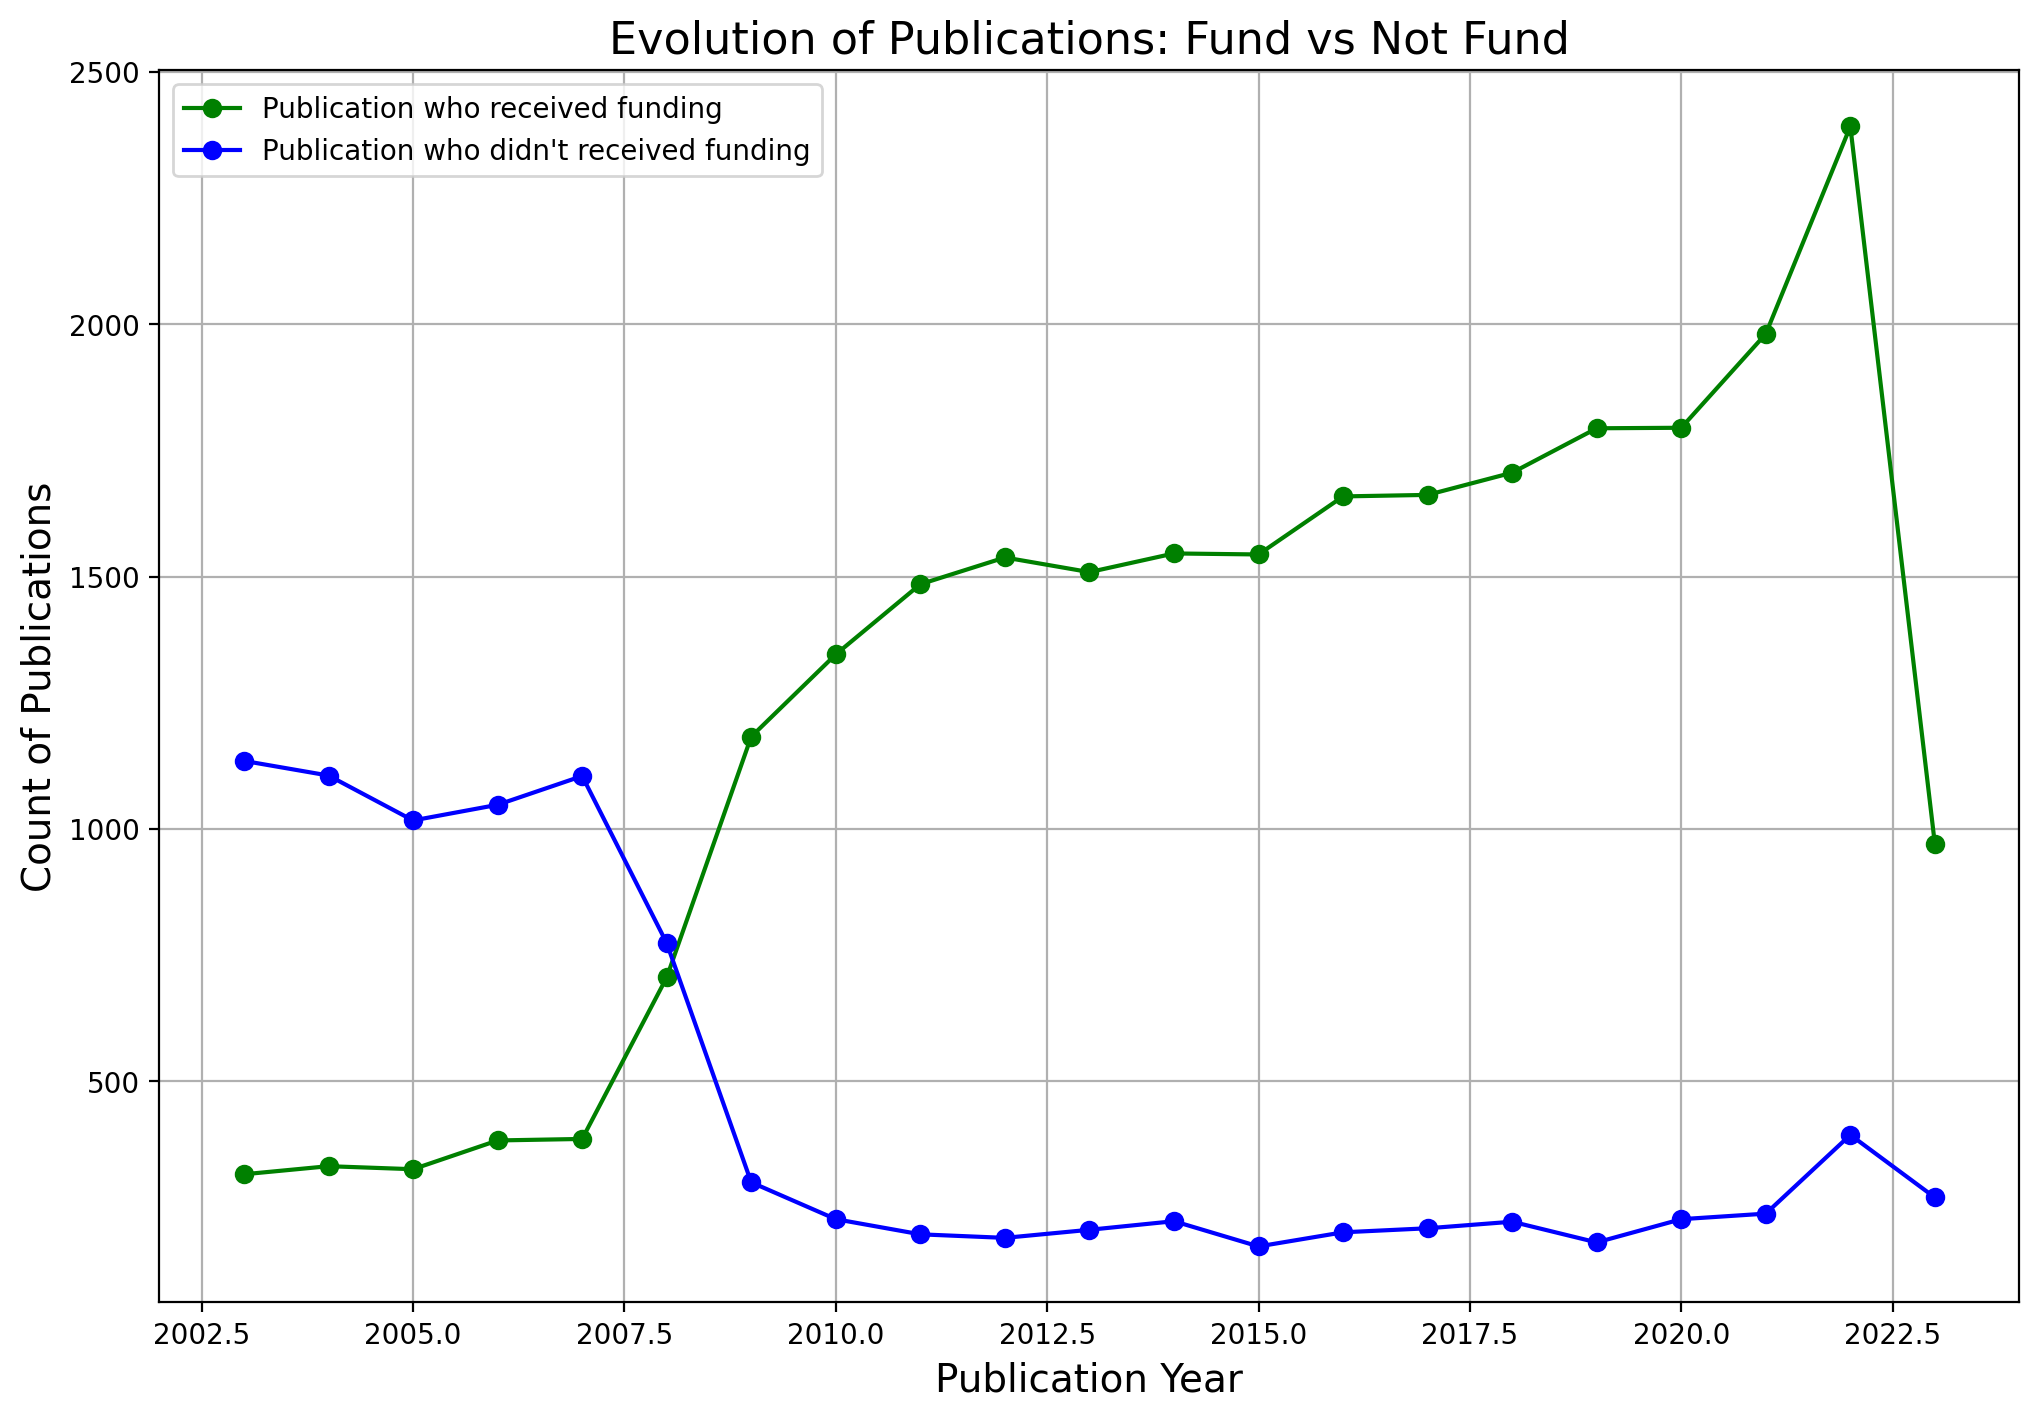

In [49]:
import matplotlib.pyplot as plt

# Assuming df is your dataframe
df = data_trend

plt.figure(figsize=(12, 8))

# Plotting the lines
plt.plot(df.index, df['funding_trend_all'], label='Publication who received funding', marker='o', color='green')
plt.plot(df.index, df['not_funding_trend_all'], label="Publication who didn't received funding", marker='o', color='blue')

# Adding labels, title and legend
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Count of Publications', fontsize=14)
plt.title('Evolution of Publications: Fund vs Not Fund', fontsize=16)
plt.legend()

# Emphasize the starting point of data for Global South
#plt.annotate('Data for Global South begins (2003)',
#             xy=(2004, df.loc[2004, 'funding_trend_all']),
#             xytext=(2004, df.loc[2004, 'funding_trend_all'] + 500),
#             arrowprops=dict(facecolor='red', shrink=0.05))

# Highlight the recent increase for Global South
#plt.annotate('Rapid increase for Global South (2020)',
#             xy=(2020, df.loc[2020, 'funding_trend_all']),
#             xytext=(2010, df.loc[2016, 'funding_trend_all'] + 500),
#             arrowprops=dict(facecolor='red', shrink=0.05))

# Grid for easier visualization
plt.grid(True)

# Save the plot at 300 dpi
#plt.tight_layout()
plt.savefig('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funding_publication_year_plot.png', dpi=300)

plt.show()


## funder

In [50]:
funder_data['Funding Name Preferred'].count()

26559

In [51]:
funder_data

,,,Funding Name Preferred,funder_trend
wos_ID,"Times Cited, All Databases",Publication Year,,
wos:000183215700003,19,2003,NaN,not_funding_trend_all
wos:000180955900018,114,2003,NaN,not_funding_trend_all
wos:000183683300008,2,2003,NaN,not_funding_trend_all
wos:000184760800009,26,2003,NaN,not_funding_trend_all
wos:000187153000005,14,2003,NaN,not_funding_trend_all
...,...,...,...,...
wos:000959867000004,0,2023,national natural science foundation of china(n...,funding_trend_all
wos:000968835000001,0,2023,industry -university project of fujian provinc...,funding_trend_all
wos:000933339800001,0,2023,NaN,not_funding_trend_all


In [52]:
import pandas as pd

# Your DataFrame is named funder_data
funder_list = funder_data['Funding Name Preferred'].str.split(';').explode().str.strip()

# Count the unique funder names
unique_funder_count = funder_list.nunique()

print('The number of unique funder is:', unique_funder_count)

# Count the appearances of each funder
funder_counts = funder_list.value_counts().to_frame()

funder_counts['%'] = funder_counts['Funding Name Preferred']/funder_data['Funding Name Preferred'].count()*100

#


funder_counts##.head(50)

The number of unique funder is: 30676


,Funding Name Preferred,%
national natural science foundation of china(national natural science foundation of china (nsfc)),1997,7.519108
national institutes of health(united states department of health & human servicesnational institutes of health (nih) - usa),1367,5.147031
nih(united states department of health & human servicesnational institutes of health (nih) - usa),1285,4.838285
,1232,4.638729
national science foundation(national science foundation (nsf)),916,3.448925
...,...,...
fcmb aps,1,0.003765
start programme(austrian science fund (fwf)),1,0.003765
national science centre within sonata,1,0.003765
european union framework 7 programme health project concord (control of community-acquired mrsa: rationale and development of counteractions),1,0.003765


In [53]:
funder_list

wos_ID               Times Cited, All Databases  Publication Year
wos:000183215700003  19                          2003                                                              NaN
wos:000180955900018  114                         2003                                                              NaN
wos:000183683300008  2                           2003                                                              NaN
wos:000184760800009  26                          2003                                                              NaN
wos:000187153000005  14                          2003                                                              NaN
                                                                                           ...                        
wos:000933339800001  0                           2023                                                              NaN
wos:000914484900001  5                           2023                                                

In [54]:
funder_list2 = funder_list.to_frame().reset_index().set_index('Funding Name Preferred')
funder_list2

,wos_ID,"Times Cited, All Databases",Publication Year
Funding Name Preferred,,,
NaN,wos:000183215700003,19,2003
NaN,wos:000180955900018,114,2003
NaN,wos:000183683300008,2,2003
NaN,wos:000184760800009,26,2003
NaN,wos:000187153000005,14,2003
...,...,...,...
NaN,wos:000933339800001,0,2023
NaN,wos:000914484900001,5,2023
national research foundation of korea(national research foundation of korea),wos:000912073200001,1,2023


In [55]:
# import funder clean
funder_counts_clean = pd.read_excel(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Funding-Name-Preferred-csv2.xls')[
    ['Funding_Name_Preferred','Funding_Name_Preferred.1','Funding_Name_Preferred_clean']].set_index('Funding_Name_Preferred.1')
funder_counts_clean

,Funding_Name_Preferred,Funding_Name_Preferred_clean
Funding_Name_Preferred.1,,
NaN,NaN,NaN
agriculture and horticulture development board,agriculture and horticulture development board,agriculture and horticulture development board
ake wiberg foundation,ake wiberg foundation,ake wiberg foundation
almond board of california,almond board of california,almond board of california
ambrose monell foundation,ambrose monell foundation,ambrose monell foundation
...,...,...
xunta de galicia via an angeles alvarino fellowship,xunta de galicia via an angeles alvarino fello...,xunta de galicia
"xunta de galicia, conselleria de sanidade(xunta de galicia)","xunta de galicia, conselleria de sanidade(xunt...",xunta de galicia
"youth innovation team project for talent introduction and cultivation for the universities in shandong province, china",youth innovation team project for talent intro...,youth innovation team project for talent intro...


In [56]:
funder_list_and_clean = funder_list2.merge(funder_counts_clean,
                                           left_on='Funding Name Preferred',
                                           right_on='Funding_Name_Preferred',
                                           how='left').set_index(['wos_ID','Publication Year'])
funder_list_and_clean

,,"Times Cited, All Databases",Funding_Name_Preferred,Funding_Name_Preferred_clean
wos_ID,Publication Year,,,
wos:000183215700003,2003,19,NaN,NaN
wos:000180955900018,2003,114,NaN,NaN
wos:000183683300008,2003,2,NaN,NaN
wos:000184760800009,2003,26,NaN,NaN
wos:000187153000005,2003,14,NaN,NaN
...,...,...,...,...
wos:000933339800001,2023,0,NaN,NaN
wos:000914484900001,2023,5,NaN,NaN
wos:000912073200001,2023,1,national research foundation of korea(national...,national research foundation of korea (nrf)


In [57]:
# Count the unique funder clean names
unique_funder_clean_count = funder_list_and_clean['Funding_Name_Preferred_clean'].nunique()

print('The number of unique funder_clean is:', unique_funder_clean_count)

#
funder_list_and_clean2 = funder_list_and_clean.reset_index()

# and sum citations within each group
grouped = funder_list_and_clean2.groupby(['Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/funder_data['Funding Name Preferred'].count()*100

# Rename columns
grouped.columns = ['Funding_Name_Preferred_clean', 'count','citation', '%']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funder_clean_counts_citation.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funder_clean_counts_citation.csv')

grouped##.head(50)

The number of unique funder_clean is: 17568


,Funding_Name_Preferred_clean,count,citation,%
0,'association de chefs de service du chru de na...,1,1,0.003765
1,'castile and leon' autonomy (spain),1,4,0.003765
2,"'centre de recherche public-sante', luxembourg",2,34,0.007530
3,'complexo de central de apoio a pesquisa (comc...,1,11,0.003765
4,'conseil general de l'eure',1,13,0.003765
...,...,...,...,...
17563,zunyi science and technology cooperation,2,15,0.007530
17564,zurcher krebsliga,1,68,0.003765
17565,zurich center for integrative human physiology...,1,11,0.003765
17566,zymo research,1,3,0.003765


In [58]:
funder_list_and_clean2

,wos_ID,Publication Year,"Times Cited, All Databases",Funding_Name_Preferred,Funding_Name_Preferred_clean
0,wos:000183215700003,2003,19,NaN,NaN
1,wos:000180955900018,2003,114,NaN,NaN
2,wos:000183683300008,2003,2,NaN,NaN
3,wos:000184760800009,2003,26,NaN,NaN
4,wos:000187153000005,2003,14,NaN,NaN
...,...,...,...,...,...
84909,wos:000933339800001,2023,0,NaN,NaN
84910,wos:000914484900001,2023,5,NaN,NaN
84911,wos:000912073200001,2023,1,national research foundation of korea(national...,national research foundation of korea (nrf)
84912,wos:000912073200001,2023,1,development of next-generation biorefinery pla...,development of next-generation biorefinery pla...


In [59]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
funder_list_and_clean2 = funder_list_and_clean.drop(columns='Funding_Name_Preferred').drop_duplicates().dropna().reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
funder_list_and_clean2['Year Group'] = pd.cut(funder_list_and_clean2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and count author appearances in each group
grouped = funder_list_and_clean2.groupby(['Year Group','Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Convert the Series to a DataFrame and rename the column
funder_counts_group = grouped.rename(columns={'wos_ID': 'counts'}).reset_index().drop(columns='index')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (funder_counts_group['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
funder_counts_group_filtered = funder_counts_group[~mask]

# Rename columns
author_counts_group_filtered.columns = ['Year Group','Funding_Name_Preferred_clean', 'Publication Count', 'Total Citations', 'Average Citation Count']

# Print the result
funder_counts_group_filtered#.tail(60)

,Year Group,Funding_Name_Preferred_clean,counts,"Times Cited, All Databases",Average Citation Count
282,"[2003, 2008)",agence nationale de la recherche (anr),1,50,50.000000
1299,"[2003, 2008)",bhp hrsa hhs,1,14,14.000000
1454,"[2003, 2008)",biotechnology and biological sciences research...,38,3071,80.815789
1569,"[2003, 2008)",breast cancer now,1,54,54.000000
1867,"[2003, 2008)",cancer research uk,3,96,32.000000
...,...,...,...,...,...
87811,"[2023, 2028)",zhejiang university k.p.chao's high technology...,1,0,0.000000
87817,"[2023, 2028)","zhuhai yilong biotechnology co., ltd.",1,0,0.000000
87822,"[2023, 2028)",zju pii-molecular devices joint laboratory,1,6,6.000000
87832,"[2023, 2028)",zonmw(netherlands organization for health rese...,1,2,2.000000


In [60]:
# Reset the index to make 'Publication Year' a regular column
funder_list_and_clean3 = funder_list_and_clean.drop(columns='Funding_Name_Preferred').dropna().reset_index()
# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
funder_list_and_clean3['Year Group'] = pd.cut(funder_list_and_clean3['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and 'Funding_Name_Preferred_clean', count number of publications
# and sum citations within each group
grouped = funder_list_and_clean3.groupby(['Year Group','Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','Funding_Name_Preferred_clean', 'Publication Count', 'Total Citations']

grouped_filtered


,Year Group,Funding_Name_Preferred_clean,Publication Count,Total Citations
282,"[2003, 2008)",agence nationale de la recherche (anr),1,50
1299,"[2003, 2008)",bhp hrsa hhs,1,14
1454,"[2003, 2008)",biotechnology and biological sciences research...,86,6539
1569,"[2003, 2008)",breast cancer now,1,54
1867,"[2003, 2008)",cancer research uk,3,96
...,...,...,...,...
87811,"[2023, 2028)",zhejiang university k.p.chao's high technology...,1,0
87817,"[2023, 2028)","zhuhai yilong biotechnology co., ltd.",1,0
87822,"[2023, 2028)",zju pii-molecular devices joint laboratory,1,6
87832,"[2023, 2028)",zonmw(netherlands organization for health rese...,1,2


In [61]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Funding_Name_Preferred_clean', columns='Year Group', values=['Publication Count', 'Total Citations'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funder_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funder_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count  \
Year Group                                              [2003, 2008)   
Funding_Name_Preferred_clean                                           
'association de chefs de service du chru de nan...               NaN   
'castile and leon' autonomy (spain)                              NaN   
'centre de recherche public-sante', luxembourg                   NaN   
'complexo de central de apoio a pesquisa (comca...               NaN   
'conseil general de l'eure'                                      NaN   
...                                                              ...   
zunyi science and technology cooperation                         NaN   
zurcher krebsliga                                                NaN   
zurich center for integrative human physiology ...               NaN   
zymo research                                                    NaN   
zymogenetics                                                     NaN   

                                                                              \
Year Group                                         [2008, 2013) [2013, 2018)   
Funding_Name_Preferred_clean                                                   
'association de chefs de service du chru de nan...          NaN          NaN   
'castile and leon' autonomy (spain)                         NaN          1.0   
'centre de recherche public-sante', luxembourg              1.0          1.0   
'complexo de central de apoio a pesquisa (comca...          NaN          NaN   
'conseil general de l'eure'                                 1.0          NaN   
...                                                         ...          ...   
zunyi science and technology cooperation                    NaN          NaN   
zurcher krebsliga                                           1.0          NaN   
zurich center for integrative human physiology ...          1.0          NaN   
zymo research                                               NaN          NaN   
zymogenetics                                                1.0          NaN   

                                                                              \
Year Group                                         [2018, 2023) [2023, 2028)   
Funding_Name_Preferred_clean                                                   
'association de chefs de service du chru de nan...          1.0          NaN   
'castile and leon' autonomy (spain)                         NaN          NaN   
'centre de recherche public-sante', luxembourg              NaN          NaN   
'complexo de central de apoio a pesquisa (comca...          1.0          NaN   
'conseil general de l'eure'                                 NaN          NaN   
...                                                         ...          ...   
zunyi science and technology cooperation                    1.0          1.0   
zurcher krebsliga                                           NaN          NaN   
zurich center for integrative human physiology ...          NaN          NaN   
zymo research                                               1.0          NaN   
zymogenetics                                                NaN          NaN   

                                                   Total Citations  \
Year Group                                            [2003, 2008)   
Funding_Name_Preferred_clean                                         
'association de chefs de service du chru de nan...             NaN   
'castile and leon' autonomy (spain)                            NaN   
'centre de recherche public-sante', luxembourg                 NaN   
'complexo de central de apoio a pesquisa (comca...             NaN   
'conseil general de l'eure'                                    NaN   
...                                                            ...   
zunyi science and technology cooperation                       NaN   
zurcher krebsliga                                              NaN   
zurich center for integrative 

# topics

In [62]:
topics_data_citation = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()[
    ['UT (Unique WOS ID)','Publication Year','Topic N°', 'Times Cited, All Databases']]

topics_data_citation = topics_data_citation.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])
topics_data_citation

,Publication Year,Topic N°,"Times Cited, All Databases"
wos_ID,,,
wos:000183215700003,2003,6,19
wos:000180955900018,2003,11,114
wos:000183683300008,2003,11,2
wos:000184760800009,2003,12,26
wos:000187153000005,2003,13,14
...,...,...,...
wos:000959867000004,2023,13,0
wos:000968835000001,2023,4,0
wos:000933339800001,2023,12,0


In [63]:
#citation_data = data.copy().reset_index().set_index(['wos_ID','Publication Year'])[['Times Cited, All Databases']]
#citation_data

In [64]:
#topics_data_citation = pd.concat([topics_data, citation_data], axis=1)
#topics_data_citation

In [65]:
# Count the unique topic names
unique_topic_count = topics_data_citation['Topic N°'].nunique()

print('The number of unique topics is:', unique_topic_count)

#
topics_data_citation2 = topics_data_citation.reset_index()

# and sum citations within each group
grouped = topics_data_citation2.groupby(['Topic N°']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/topics_data_citation['Topic N°'].count()*100

grouped['citation_means'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Rename columns
grouped.columns = ['Topic N°', 'Publication Count', 'Total Citations', '%','citation_means']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topics_counts_citation.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topics_counts_citation.csv')

grouped##.head(50)

The number of unique topics is: 19


,Topic N°,Publication Count,Total Citations,%,citation_means
0,0,707,20935,1.952931,29.611033
1,1,2832,116073,7.822772,40.986229
2,2,2328,65672,6.430584,28.209622
3,3,1337,46835,3.693166,35.029918
4,4,2505,76856,6.919507,30.681038
5,5,3433,152627,9.482901,44.458782
6,6,4179,112727,11.543561,26.974635
7,7,1180,41600,3.259488,35.254237
8,8,3936,110287,10.872327,28.020071
9,9,605,16065,1.671178,26.553719


In [66]:
topics_data2 = topics_data_citation.reset_index()#.set_index('wos_ID')
# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
topics_data2['Year Group'] = pd.cut(topics_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and 'Topic N°', count number of publications
# and sum citations within each group
grouped = topics_data2.groupby(['Year Group','Topic N°']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','Topic N°', 'Publication Count', 'Total Citations']

grouped_filtered


,Year Group,Topic N°,Publication Count,Total Citations
0,"[2003, 2008)",0,224,7591
1,"[2003, 2008)",1,236,24426
2,"[2003, 2008)",2,592,26768
3,"[2003, 2008)",3,448,18105
4,"[2003, 2008)",4,328,20471
...,...,...,...,...
90,"[2023, 2028)",14,54,12
91,"[2023, 2028)",15,25,23
92,"[2023, 2028)",16,56,26
93,"[2023, 2028)",17,82,15


In [67]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Topic N°', columns='Year Group', values=['Publication Count', 'Total Citations'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topics_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topics_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                                         \
Year Group      [2003, 2008) [2008, 2013) [2013, 2018) [2018, 2023)   
Topic N°                                                              
0                        224          171          162          138   
1                        236          462          752         1217   
2                        592          632          579          480   
3                        448          342          304          216   
4                        328          526          685          860   
5                        535          660          854         1267   
6                       1034         1002         1075          980   
7                        370          290          250          253   
8                        469          591          927         1722   
9                        206          195          130           71   
10                       316          412          468          557   
11                       694          549          429          339   
12                       370          516          585          733   
13                       335          408          377          262   
14                       121          200          283          491   
15                        73           69           57          119   
16                       403          402          446          462   
17                       234          391          463          669   
18                       166          128          106           94   

                        Total Citations                            \
Year Group [2023, 2028)    [2003, 2008) [2008, 2013) [2013, 2018)   
Topic N°                                                            
0                    12            7591         6244         5773   
1                   165           24426        28932        40022   
2                    45           26768        22185        12536   
3                    27           18105        12587        11060   
4                   106           20471        26138        20731   
5                   117           51544        57237        29896   
6                    88           45688        36000        22039   
7                    17           20625        10566         7021   
8                   227           29151        27561        31659   
9                     3            8537         4673         2256   
10                  100           22876        22601        15506   
11                   21           26353        16567         8491   
12                   76           20608        20271        15600   
13                   16           20281        16949        10799   
14                   54            8106        10102        11688   
15                   25            3648         2409         2199   
16                   56           24801        19608        13402   
17                   82           14337        14337        13315   
18                    3            7134         3674         2062   

                                      
Year Group [2018, 2023) [2023, 2028)  
Topic N°                              
0                  1324            3  
1                 22641           52  
2                  4174            9  
3                  5078            5  
4                  9488           28  
5                 13930           20  
6                  8982           18  
7                  3375           13  
8                 21799          117  
9                   598            1  
10                 7907           57  
11                 2710            3  
12                 9148           23  
13                 2891            8  
14                 7987           12  
15                 2177           23  
16                 5346           26  
17                 6092           15  
18                  736            0

In [68]:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

NameError: ignored

In [ ]:
country_data['number_of_country'] = country_data.notnull().sum(axis=1)
number_country = country_data[['number_of_country']]
number_country = number_country.reset_index().rename(columns = {'UT (Unique WOS ID)':'wos_ID'})
number_country['wos_ID'] = number_country['wos_ID'].str.lower()
number_country

In [ ]:
number_country.describe()

In [ ]:
number_country.isna().sum()

In [ ]:
# number_country#.head(60)

In [ ]:
data_and_number_country = pd.concat([data.set_index('wos_ID'),
                           number_country.set_index('wos_ID')],
                          axis=1)
data_and_number_country#.head(2)

In [ ]:
# to drop rows with 0 values in column 'number_of_country':
data_and_number_country = data_and_number_country[data_and_number_country['number_of_country'] != 0]

In [ ]:
# data_and_number_country.describe()

In [ ]:
data_and_number_country.isna().sum()

## analysis based on number of country

### proportion all

In [ ]:
data_and_number_country['number_of_country'].isna().sum()

In [ ]:
data_and_number_countryT = data_and_number_country.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country.columns:
    number_of_country_count_list.append(data_and_number_country.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'all_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'all_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_all = data_and_number_countryT_concat[['countries','all_number_of_country_count','all_number_of_country_mean']]

# save data
data_and_number_countryT_concat_all.to_csv(f'../TABLES/region_countries_org_number_of_country_count_mean.csv')
data_and_number_countryT_concat_all

In [ ]:
len(number_of_country_count)

In [ ]:
len(number_of_country_mean)

In [ ]:
len(countries)

In [ ]:
vvvvvvvvvvvvvvvvvv

### proportion fund

In [ ]:
data_and_number_country_fund = data_and_number_country.loc[data_and_number_country['funding_yes'] == 1]
data_and_number_country_fund.shape

In [ ]:
data_and_number_countryT = data_and_number_country_fund.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country_fund.columns:
    number_of_country_count_list.append(data_and_number_country_fund.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country_fund.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country_fund.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'fund_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'fund_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_number_of_country_fund = data_and_number_countryT_concat[['countries','fund_number_of_country_count','fund_number_of_country_mean']]

# save data
# data_and_number_countryT_concat_all.to_csv(f'../TABLES/countries_fund_number_of_country_count_mean.csv')
data_and_number_countryT_concat_number_of_country_fund

### proportion no fund

In [ ]:
data_and_number_country_no_fund = data_and_number_country.loc[data_and_number_country['funding_yes'] == 0]
data_and_number_country_no_fund.shape

In [ ]:
data_and_number_countryT = data_and_number_country_no_fund.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country_no_fund.columns:
    number_of_country_count_list.append(data_and_number_country_no_fund.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country_no_fund.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country_no_fund.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'no_fund_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'no_fund_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_number_of_country_nofund = data_and_number_countryT_concat[['countries','no_fund_number_of_country_count','no_fund_number_of_country_mean']]

# save data
# data_and_number_countryT_concat_all.to_csv(f'../TABLES/countries_no_fund_number_of_country_count_mean.csv')
data_and_number_countryT_concat_number_of_country_nofund

### concat and save data

In [ ]:
# concatenate dataframes on index
concat_data_number_of_country_list = pd.concat([data_and_number_countryT_concat_all.set_index('countries'),
                                    data_and_number_countryT_concat_number_of_country_fund.set_index('countries'),
                                    data_and_number_countryT_concat_number_of_country_nofund.set_index('countries')],
                                    axis=1)
# save data
concat_data_number_of_country_list.to_csv(f'../TABLES/concat_data_number_of_country_list.csv')
concat_data_number_of_country_list

### significance

In [ ]:
number_country.describe()

In [ ]:
fund_number_of_country = data_and_number_country.loc[data_and_number_country['funding_yes'] == 1]['number_of_country']#.to_list()
fund_number_of_country.describe()

In [ ]:
no_fund_number_of_country = data_and_number_country.loc[data_and_number_country['funding_yes'] == 0]['number_of_country']#.to_list()
no_fund_number_of_country.describe()

In [ ]:
test_sig(fund_number_of_country, no_fund_number_of_country)

In [ ]:
fund_number_of_country_new = [x for x in fund_number_of_country if x != 0]
no_fund_number_of_country_new = [x for x in no_fund_number_of_country if x != 0]

In [ ]:
test_sig(fund_number_of_country_new, no_fund_number_of_country_new)

In [ ]:
import plotly.express as px
fig = px.box(data_and_number_country, x="funding_yes", y='number_of_country', color="funding_yes")
# setting the y-axis range from 0 to 50
fig.update_layout(yaxis_range=[-2,100])
fig.update_layout(font_size=20)

fig.show()